# IMPORTING <font color="green">LIBRARIES</font>

In [1]:
import pandas as pd
import statistics as st
import tensorflow as tf
from keras.models import Sequential,load_model
from keras.optimizers import RMSprop,Adam
from keras.layers import Dense,Flatten,Dropout,Activation
from sklearn.metrics import accuracy_score,r2_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

/home/vinoth/.local/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/vinoth/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (
/tmp/ipykernel_135190/4243905894.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
2024-09-02 22:25:14.538496: I tensorflow/

## LOAD THE <font color="red">DATASET</font>

In [2]:
dataset = pd.read_csv('archive/angles.csv')
dataset.head()

,q1,q2,q3,q4,q5,q6,x,y,z
0,1.1220,1.72850,0.261570,0.064988,0.078599,0.0,0.074851,0.156260,-0.120010
1,2.1596,1.91990,-0.291750,1.682000,1.434100,0.0,-0.233140,0.221450,-0.118110
2,-1.3317,-0.95923,0.929730,0.293130,-1.461900,0.0,-0.000070,-0.087032,0.592620
3,2.0646,0.86330,-0.040496,-0.001953,-1.053000,0.0,-0.252270,0.468410,0.308140
4,2.2906,1.41060,0.510450,2.792500,2.094400,0.0,-0.211200,0.208560,0.039089


In [3]:
coords = dataset[['x', 'y', 'z']]
coords

,x,y,z
0,0.074851,0.156260,-0.120010
1,-0.233140,0.221450,-0.118110
2,-0.000070,-0.087032,0.592620
3,-0.252270,0.468410,0.308140
4,-0.211200,0.208560,0.039089
...,...,...,...
77414,0.570150,0.060495,0.085591
77415,-0.401170,-0.397730,0.551930
77416,0.307020,-0.357470,0.131700
77417,-0.189310,-0.486330,0.117030


In [4]:
thetas = dataset[['q1', 'q2', 'q3','q4','q5','q6']]
thetas

,q1,q2,q3,q4,q5,q6
0,1.122000,1.72850,0.261570,0.064988,0.078599,0.0
1,2.159600,1.91990,-0.291750,1.682000,1.434100,0.0
2,-1.331700,-0.95923,0.929730,0.293130,-1.461900,0.0
3,2.064600,0.86330,-0.040496,-0.001953,-1.053000,0.0
4,2.290600,1.41060,0.510450,2.792500,2.094400,0.0
...,...,...,...,...,...,...
77414,0.105870,1.47390,-0.599280,0.005901,-0.222910,0.0
77415,0.781430,-1.49020,-0.775790,-0.059077,-0.045498,0.0
77416,-0.861230,1.03360,0.050204,-0.009230,-0.037542,0.0
77417,-1.995400,1.29150,-0.175460,-0.458960,-1.060300,0.0


In [5]:
d1 = coords.shape   # XYZ Coordinates
d2 = thetas.shape   # Theta values

In [6]:
d1[1]

3

# <font color="BLUE"> PREPROCESSING </font> 

In [6]:
xvals = coords['x']
yvals = coords['y']
zvals = coords['z']

print(min(xvals), max(yvals))
print(min(yvals), max(yvals))
print(min(zvals), max(zvals))

-0.57999 0.57999
-0.57986 0.57999
-0.18382 0.86989


In [8]:
xvals.duplicated().sum()

17462

In [9]:
yvals.duplicated().sum()

17525

In [7]:
print(xvals.mean(), yvals.mean(), zvals.mean())

0.0036937382173884955 -0.0013598807755848047 0.3248726595691562


/tmp/ipykernel_135190/3704942368.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


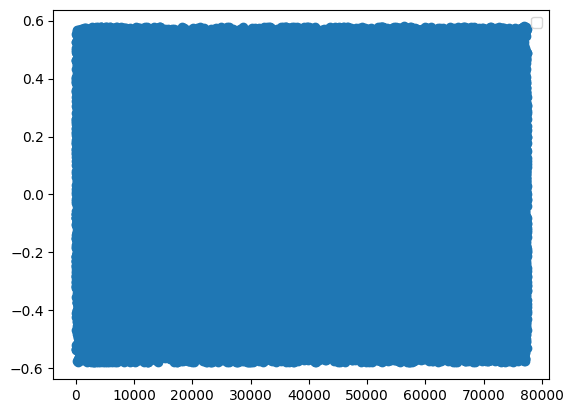

In [8]:
plt.scatter(np.linspace(1,len(xvals),len(xvals)),xvals)
plt.legend()
plt.show()

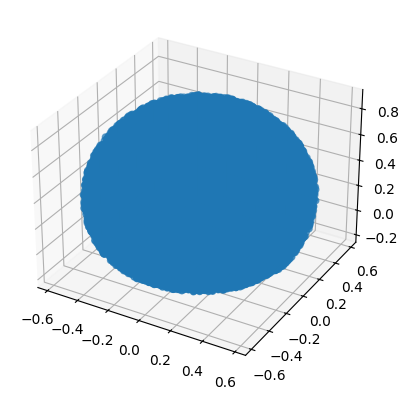

In [9]:
ax = plt.axes(projection='3d')
ax.scatter(xvals.to_numpy(),yvals.to_numpy(),zvals.to_numpy())
plt.show()

## <font color = 'red'> TRAIN, VALIDATE, TEST SETS </font>

In [10]:
XYZ_train_val, XYZ_test, thetas_train_val, thetas_test = train_test_split(coords, thetas, test_size=0.2, random_state=42)

XYZ_train, XYZ_val, thetas_train, thetas_val = train_test_split(XYZ_train_val, thetas_train_val, test_size=0.2, random_state=42)

print(f"XYZ Training set size: {len(XYZ_train)}")
print(f"XYZ Validation set size: {len(XYZ_val)}")
print(f"XYZ Test set size: {len(XYZ_test)}")

print('\n')
print(f"thetas Training set size: {len(thetas_train)}")
print(f"thetas Validation set size: {len(thetas_val)}")
print(f"thetas Test set size: {len(thetas_test)}")

XYZ Training set size: 49548
XYZ Validation set size: 12387
XYZ Test set size: 15484


thetas Training set size: 49548
thetas Validation set size: 12387
thetas Test set size: 15484


## <font color = 'yellow'> BUILD MODEL </font>

In [14]:
model = Sequential()
model.add(Dense(64,input_shape=([d1[1]]),activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(6))
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.0001, epsilon=1e-06),metrics=['mae'])
#model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.0001, rho=0.9, epsilon=1e-06),metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                256       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 6)                 390       
                                                                 
Total params: 13126 (51.27 KB)
Trainable params: 13126 (51.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
epochs = 2000
history = model.fit(XYZ_train, thetas_train, epochs=epochs)

Epoch 1/2000
1549/1549 [==============================] - 2s 864us/step - loss: 0.7727 - mae: 0.4985
Epoch 2/2000
1549/1549 [==============================] - 1s 814us/step - loss: 0.6212 - mae: 0.4027
Epoch 3/2000
1549/1549 [==============================] - 1s 815us/step - loss: 0.5769 - mae: 0.3599
Epoch 4/2000
1549/1549 [==============================] - 1s 834us/step - loss: 0.5551 - mae: 0.3395
Epoch 5/2000
1549/1549 [==============================] - 1s 813us/step - loss: 0.5405 - mae: 0.3248
Epoch 6/2000
1549/1549 [==============================] - 1s 841us/step - loss: 0.5300 - mae: 0.3153
Epoch 7/2000
1549/1549 [==============================] - 1s 811us/step - loss: 0.5222 - mae: 0.3082
Epoch 8/2000
1549/1549 [==============================] - 1s 833us/step - loss: 0.5158 - mae: 0.3027
Epoch 9/2000
1549/1549 [==============================] - 1s 813us/step - loss: 0.5104 - mae: 0.2985
Epoch 10/2000
1549/1549 [==============================] - 1s 837us/step - loss: 0.5058 - m

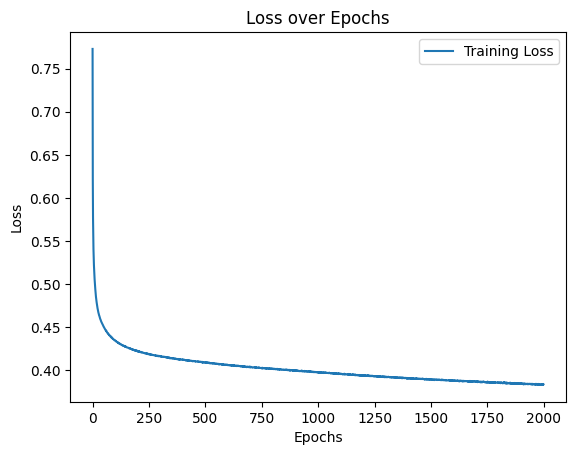

In [16]:
plt.plot(history.epoch,history.history['loss'], label='Training Loss')
#plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [17]:
model.save(filepath=f'models/finalmodelfull{epochs}.h5');

/home/vinoth/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [11]:
model = load_model('models/finalmodelfull1000.h5')

In [15]:
model2k = load_model('models/finalmodelfull2000.h5')

## ACCURACY
The accuracy of the model is evaluated using the mean absolute error (MAE) and the mean squared

In [12]:
thetas_val_pred = model.predict(XYZ_val)
print('done')
val_accuracy = r2_score(thetas_val,thetas_val_pred)
print(f"Validation Accuracy after Hyperparameter Tuning: {val_accuracy:.2f}")

thetas_test_pred = model.predict(XYZ_test)
test_accuracy = r2_score(thetas_test, thetas_test_pred)
print(f"Test Accuracy after Hyperparameter Tuning: {test_accuracy:.2f}")

388/388 [==============================] - 0s 507us/step
done
Validation Accuracy after Hyperparameter Tuning: 0.61
484/484 [==============================] - 0s 498us/step
Test Accuracy after Hyperparameter Tuning: 0.61


## CHECK

We can check the model's prediction for a single point input

In [13]:
x,y,z = XYZ_val.iloc[1431]
inputval = np.array([[x,y,z]])
#inputval = np.array([[0.19,-0.19,0.54]])
print(inputval)
print(inputval.shape)

[[0.2185  0.40765 0.19339]]
(1, 3)


In [16]:
model2k.predict(inputval)

1/1 [==============================] - 0s 57ms/step


array([[ 1.0470378 ,  0.8751917 ,  0.18619496, -0.0382641 , -0.2798438 ,
         0.05011519]], dtype=float32)

In [17]:
j = model.predict(inputval)
j

1/1 [==============================] - 0s 13ms/step


array([[ 1.056859  ,  0.84090817,  0.24093068,  0.01547204, -0.6826017 ,
         0.00185656]], dtype=float32)